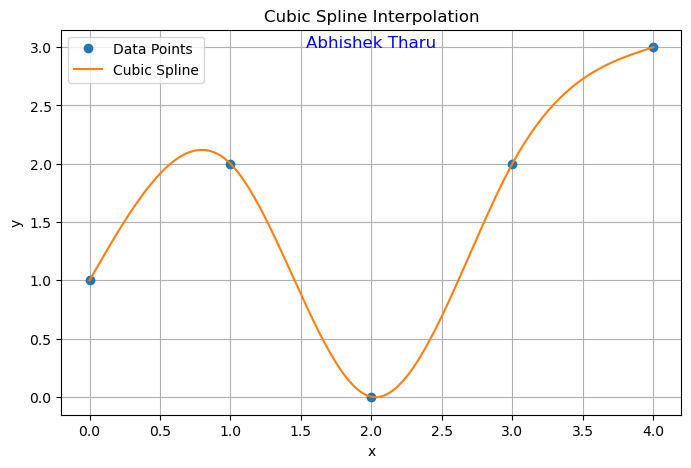

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def cubic_spline(x, y):
    n = len(x) - 1
    h = [x[i+1] - x[i] for i in range(n)]

    # Step 1: Set up the system of equations
    alpha = [0] * (n)
    for i in range(1, n):
        alpha[i] = (3/h[i])*(y[i+1]-y[i]) - (3/h[i-1])*(y[i]-y[i-1])

    # Step 2: Solve the tridiagonal system
    l = [1] + [0]*n
    mu = [0]* (n+1)
    z = [0]* (n+1)

    for i in range(1, n):
        l[i] = 2*(x[i+1]-x[i-1]) - h[i-1]*mu[i-1]
        mu[i] = h[i]/l[i]
        z[i] = (alpha[i] - h[i-1]*z[i-1])/l[i]

    l[n] = 1
    z[n] = 0

    # Step 3: Calculate coefficients
    a = y
    b = [0]*n
    c = [0]*(n+1)
    d = [0]*n

    for j in reversed(range(n)):
        c[j] = z[j] - mu[j]*c[j+1]
        b[j] = ((a[j+1]-a[j])/h[j]) - h[j]*(c[j+1]+2*c[j])/3
        d[j] = (c[j+1]-c[j])/(3*h[j])

    return a, b, c, d, x

def spline_eval(x_data, a, b, c, d, x, xp):
    # Find the right interval
    for i in range(len(x_data) - 1):
        if x_data[i] <= xp <= x_data[i+1]:
            dx = xp - x_data[i]
            return a[i] + b[i]*dx + c[i]*dx**2 + d[i]*dx**3
    return None

# Example data
x = [0, 1, 2, 3, 4]
y = [1, 2, 0, 2, 3]

# Compute spline coefficients
a, b, c, d, x_data = cubic_spline(x, y)

# Evaluate and plot
x_vals = np.linspace(x[0], x[-1], 200)
y_vals = [spline_eval(x_data, a, b, c, d, x_data, val) for val in x_vals]

plt.figure(figsize=(8, 5))
plt.plot(x, y, 'o', label='Data Points')
plt.plot(x_vals, y_vals, label='Cubic Spline')
plt.title("Cubic Spline Interpolation")
plt.text((x[0]+x[-1])/2, max(y), 'Abhishek Tharu', ha='center', fontsize=12, color='blue')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()
